**Переда запуском добавь коко2014 [датасет](https://www.kaggle.com/datasets/nadaibrahim/coco2014) в ноутбук)**

In [2]:
!pip install wandb
!pip install bitsandbytes
!pip install ruclip==0.0.2
!pip install transformers==4.27.4
!pip install pycocotools
!pip install git+https://github.com/openai/CLIP.git
!pip install open_clip_torch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.7/86.7 kB 8.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.3/54.3 kB 6.0 MB/s eta 0:00:00
  Created wheel for youtokentome: filename=youtokentome-1.0.6-cp310-cp310-linux_x86_64.whl size=193020 sha256=145c4ee265da8b5282965654caec42d52a8240a9770703dcfeeb04361ec7f232
  Stored in directory: /root/.cache/pip/wheels/df/85/f8/301d2ba45f43f30bed2fe413efa760bc726b8b660ed9c2900c
Successfully built youtokentome
  Attempting uninstall: more-itertools
    Found existing installation: more-itertools 10.1.0
    Uninstalling more-itertools-10.1.0:
      Successfully uninstalled more-itertools-10.1.0
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.17.3
    Uninstalling huggingface-hub-0.17.3:
      Successfully uninstalled huggingface-hub-0.17.3
ERROR: pip's dependency res

#### Качаем РУССКИЙ капчеринг

In [3]:
#!rm -rf ru_capt.json
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1uIO34T8d0ML23I30mcRFAD7niggm1kIt' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1uIO34T8d0ML23I30mcRFAD7niggm1kIt" -O ru_capt.json && rm -rf /tmp/cookies.txt

--2023-12-07 19:06:14--  https://docs.google.com/uc?export=download&confirm=t&id=1uIO34T8d0ML23I30mcRFAD7niggm1kIt
Resolving docs.google.com (docs.google.com)... 108.177.96.101, 108.177.96.113, 108.177.96.139, ...
Connecting to docs.google.com (docs.google.com)|108.177.96.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-04-1s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ngnp6bgjf30tlifeuvf4gd08kavd6g8d/1701975900000/16206607871830480110/*/1uIO34T8d0ML23I30mcRFAD7niggm1kIt?e=download&uuid=b4e71174-69a5-4cbd-a24b-50f8022aeb68 [following]
--2023-12-07 19:06:14--  https://doc-04-1s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ngnp6bgjf30tlifeuvf4gd08kavd6g8d/1701975900000/16206607871830480110/*/1uIO34T8d0ML23I30mcRFAD7niggm1kIt?e=download&uuid=b4e71174-69a5-4cbd-a24b-50f8022aeb68
Resolving doc-04-1s-docs.googleusercontent.com (doc-04-1s-docs.googleusercontent.com)... 108.177.119.132,

#### Качаем ембединги датасета

In [4]:
#!rm -rf train2014_emb.zip
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=11OpNsXhmtafzItkGxaTqMXqgL2dQycl6' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=11OpNsXhmtafzItkGxaTqMXqgL2dQycl6" -O train2014_emb.zip && rm -rf /tmp/cookies.txt
!unzip train2014_emb.zip

--2023-12-07 19:06:17--  https://docs.google.com/uc?export=download&confirm=t&id=11OpNsXhmtafzItkGxaTqMXqgL2dQycl6
Resolving docs.google.com (docs.google.com)... 108.177.96.138, 108.177.96.100, 108.177.96.102, ...
Connecting to docs.google.com (docs.google.com)|108.177.96.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-00-38-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/hcfai5gmekkcfb2gd2cbm5jk4q03eg1l/1701975975000/09074642392443333439/*/11OpNsXhmtafzItkGxaTqMXqgL2dQycl6?e=download&uuid=0c4591d6-1069-46c3-af4b-b8778301afdc [following]
--2023-12-07 19:06:17--  https://doc-00-38-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/hcfai5gmekkcfb2gd2cbm5jk4q03eg1l/1701975975000/09074642392443333439/*/11OpNsXhmtafzItkGxaTqMXqgL2dQycl6?e=download&uuid=0c4591d6-1069-46c3-af4b-b8778301afdc
Resolving doc-00-38-docs.googleusercontent.com (doc-00-38-docs.googleusercontent.com)... 108.177.119.132,

In [5]:
#!rm -rf val2014_emb.zip
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1a-XuH0q5Ktlo6fIGFKQVkGEUkjiQ10X0' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1a-XuH0q5Ktlo6fIGFKQVkGEUkjiQ10X0" -O val2014_emb.zip && rm -rf /tmp/cookies.txt
!unzip val2014_emb.zip


--2023-12-07 19:06:27--  https://docs.google.com/uc?export=download&confirm=t&id=1a-XuH0q5Ktlo6fIGFKQVkGEUkjiQ10X0
Resolving docs.google.com (docs.google.com)... 108.177.96.138, 108.177.96.100, 108.177.96.102, ...
Connecting to docs.google.com (docs.google.com)|108.177.96.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0s-38-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/7h8e6qnr6jc2jhu1v65nak8gr1k8pjl3/1701975975000/09074642392443333439/*/1a-XuH0q5Ktlo6fIGFKQVkGEUkjiQ10X0?e=download&uuid=c9e43c64-1b4a-4042-bbe1-81b36fabbaa6 [following]
--2023-12-07 19:06:27--  https://doc-0s-38-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/7h8e6qnr6jc2jhu1v65nak8gr1k8pjl3/1701975975000/09074642392443333439/*/1a-XuH0q5Ktlo6fIGFKQVkGEUkjiQ10X0?e=download&uuid=c9e43c64-1b4a-4042-bbe1-81b36fabbaa6
Resolving doc-0s-38-docs.googleusercontent.com (doc-0s-38-docs.googleusercontent.com)... 108.177.119.132,

**Это сервис, чтобы сохранять логи, нужно будет [зарегаться](https://wandb.ai/site ) и получить токе)**

In [ ]:
#import wandb
#wandb.login()

In [ ]:
import json
ru_capt = {}
with open('./ru_capt.json', 'r') as file:
    for st in file:
        data = json.loads(st)
        ru_capt[data['id']] = data
        

In [6]:
len(ru_capt)

566747

In [6]:
import torchvision.datasets as dset
coco_train = dset.CocoDetection(
    root = "/kaggle/input/coco2014/train2014/train2014",
    annFile = "/kaggle/input/coco2014/captions/annotations/captions_train2014.json"
)
coco_val = dset.CocoDetection(
    root = "/kaggle/input/coco2014/val2014/val2014",
    annFile = "/kaggle/input/coco2014/captions/annotations/captions_val2014.json"
)

loading annotations into memory...
Done (t=1.36s)
creating index...
index created!
loading annotations into memory...
Done (t=0.75s)
creating index...
index created!


In [8]:
# так и должно быть
len(ru_capt), len(coco_train), len(coco_val)

(566747, 82783, 40504)

In [7]:
import torch
import torch.nn as nn
from torch.nn import functional as nnf
from torch.utils.data import Dataset, DataLoader


In [8]:
from tqdm import tqdm, trange
import os
import pickle
import sys
import argparse
import json
from typing import Tuple, Optional, Union
from torch.cuda.amp import autocast

import ruclip
import clip, open_clip
import random

In [9]:
from transformers import GPT2Config, GPT2Model
from transformers import GPT2Tokenizer, GPT2LMHeadModel

In [10]:
from transformers import AdamW, get_linear_schedule_with_warmup

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [11]:
#from multilingual_clip import pt_multilingual_clip

In [12]:
manualSeed = 1337
#manualSeed = random.randint(1, 10000) # use if you want new results
random.seed(manualSeed)
torch.manual_seed(manualSeed)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [13]:
class MLP(nn.Module):
    def __init__(self, sizes: Tuple[int, ...], bias=True, act=nn.Tanh):
        super(MLP, self).__init__()
        layers = []
        for i in range(len(sizes) - 1):
            layers.append(nn.Linear(sizes[i], sizes[i + 1], bias=bias))
            if i < len(sizes) - 2:
                layers.append(act())
        self.model = nn.Sequential(*layers)
    
    @autocast()  
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.model(x)

In [14]:
def freeze(
    model,
    freeze_emb=False,
    freeze_ln=False,
    freeze_attn=True,
    freeze_ff=True,
    freeze_other=False,
):
    
    for name, p in model.named_parameters():
    # freeze all parameters except the layernorm and positional embeddings
        name = name.lower()
        if 'ln' in name or 'norm' in name:
            p.requires_grad = not freeze_ln
        elif 'embeddings' in name:
            p.requires_grad = not freeze_emb
        elif 'mlp' in name:
            p.requires_grad = not freeze_ff
        elif 'attn' in name:
            p.requires_grad = not freeze_attn
        else:
            p.requires_grad = not freeze_other
           
    return model

In [15]:
gpt_model_name = 'sberbank-ai/rugpt3medium_based_on_gpt2'
class ClipCaptionModel(nn.Module):
    def __init__(self, prefix_length: int, prefix_size: int = 640):
        super(ClipCaptionModel, self).__init__()
        self.prefix_length = prefix_length

        self.gpt = GPT2LMHeadModel.from_pretrained(gpt_model_name)
        self.gpt_embedding_size = self.gpt.transformer.wte.weight.shape[1]

        self.clip_project = MLP((
            prefix_size, 
            self.gpt_embedding_size * prefix_length // 2,
            self.gpt_embedding_size * prefix_length
        ))
        
    def get_dummy_token(self, batch_size: int, device: torch.device) -> torch.Tensor:
        return torch.zeros(batch_size, self.prefix_length, dtype=torch.int64, device=device)
    
    @autocast() 
    def forward(
        self,        
        tokens: torch.Tensor,
        prefix: torch.Tensor,
        mask: Optional[torch.Tensor] = None,
        labels: Optional[torch.Tensor] = None
    ):
        embedding_text = self.gpt.transformer.wte(tokens)
        prefix_projections = self.clip_project(prefix.float()).view(-1, self.prefix_length, self.gpt_embedding_size)

        embedding_cat = torch.cat((prefix_projections, embedding_text), dim=1)
        if labels is not None:
            dummy_token = self.get_dummy_token(tokens.shape[0], tokens.device)
            labels = torch.cat((dummy_token, tokens), dim=1)
        out = self.gpt(inputs_embeds=embedding_cat, labels=labels, attention_mask=mask)
        
        return out

In [16]:
class ClipCaptionPrefix(ClipCaptionModel):
    def parameters(self, recurse: bool = True):
        return self.clip_project.parameters()

    def train(self, mode: bool = True):
        super(ClipCaptionPrefix, self).train(mode)
        self.gpt.eval()
        return self

In [19]:
tokenizer = GPT2Tokenizer.from_pretrained(gpt_model_name)

vocab.json:   0%|          | 0.00/1.61M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/1.27M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/574 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.25k [00:00<?, ?B/s]

In [20]:
# запустится только с gpu, очень большая штука  --- LARGE же =)
#clip_model, processor = ruclip.load("ruclip-vit-large-patch14-336", device="cuda")
clip_model, _, preprocess = open_clip.create_model_and_transforms('ViT-B-16-plus-240', pretrained="laion400m_e32")
clip_model.to(device)

100%|████████████████████████████████████████| 834M/834M [00:03<00:00, 245MiB/s]


CLIP(
  (visual): VisionTransformer(
    (conv1): Conv2d(3, 896, kernel_size=(16, 16), stride=(16, 16), bias=False)
    (patch_dropout): Identity()
    (ln_pre): LayerNorm((896,), eps=1e-05, elementwise_affine=True)
    (transformer): Transformer(
      (resblocks): ModuleList(
        (0-11): 12 x ResidualAttentionBlock(
          (ln_1): LayerNorm((896,), eps=1e-05, elementwise_affine=True)
          (attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=896, out_features=896, bias=True)
          )
          (ls_1): Identity()
          (ln_2): LayerNorm((896,), eps=1e-05, elementwise_affine=True)
          (mlp): Sequential(
            (c_fc): Linear(in_features=896, out_features=3584, bias=True)
            (gelu): GELU(approximate='none')
            (c_proj): Linear(in_features=3584, out_features=896, bias=True)
          )
          (ls_2): Identity()
        )
      )
    )
    (ln_post): LayerNorm((896,), eps=1e-05, elementwise_affine

## Эмбединги для фотографий через клип, выполнять только если нет на гугл диске)

-----------------

In [16]:
import io
import os
import PIL
import random
import numpy as np
import torch
import torchvision
import transformers
import more_itertools
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import pandas as pd
from torch.utils.data import Dataset
from tqdm import tqdm
from dataclasses import dataclass, field
import torchvision.transforms as T
import torchvision.transforms.functional as TF
import cv2
from PIL import Image
import pickle
from tqdm.contrib import tzip

def read_image(path, size=(196, 196)):
    image = cv2.imread(path)
    
    # size = 196, 196
    image = Image.fromarray(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    image.thumbnail(size, Image.Resampling.LANCZOS)
    
    return image

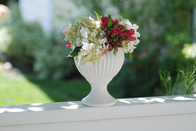

In [22]:
read_image('/kaggle/input/coco2014/train2014/train2014/COCO_train2014_000000000030.jpg')

In [29]:
first = len(coco_train)//3
second = 2*len(coco_train)//3
third = len(coco_train)

steps = [(0, first), (first, second), (second, third)]

In [44]:
all_embeddings = []
all_captions = []

for start, stop in steps:
    for i in tqdm(range(start, stop)):
        
        #image = coco_train[i][0]
        
        name_img = str(coco_train[i][1][0]['image_id'])
        name_img = "0" * (12 - len(name_img)) + name_img
        name_img = f"/kaggle/input/coco-image-caption/train2014/train2014/COCO_train2014_{name_img}.jpg"

        image = read_image(path = name_img)

        image = preprocess(image).unsqueeze(0).to(device)
        
        with torch.no_grad():
            prefix = clip_model.encode_image(image).detach().to(device)

        for capt_sample in coco_train[i][1]:
            caption = ru_capt[capt_sample['id']]
            
            text = f"Вопрос: что на изображении? Ответ: {caption['caption']}"
            # TODO: более аккуратный вопрос
            
            all_captions.append(text)
            all_embeddings.append(prefix)

100%|██████████| 27595/27595 [16:26<00:00, 27.97it/s]


In [30]:
len(all_embeddings)

NameError: name 'all_embeddings' is not defined

In [32]:
out_path = f"Features_train_coco_ru_vitb16_82783.pkl"

In [47]:
with open(out_path, 'wb') as f:
    pickle.dump({"clip_embedding": torch.cat(all_embeddings, dim=0), "captions": all_captions}, f)

print('Done')
print("%0d embeddings saved " % len(all_embeddings))

Done
414113 embeddings saved 


In [24]:
all_embeddings = []
all_captions = []


for i in tqdm(range(0, len(coco_val))):
    name_img = str(coco_val[i][1][0]['image_id'])
    name_img = "0" * (12 - len(name_img)) + name_img
    name_img = f"/kaggle/input/coco2014/val2014/val2014/COCO_val2014_{name_img}.jpg"

    image = read_image(path = name_img)

    image = preprocess(image).unsqueeze(0).to(device)

    with torch.no_grad():
        prefix = clip_model.encode_image(image).detach().to(device)

    for capt_sample in coco_train[i][1]:
        caption = ru_capt[capt_sample['id']]

        text = f"Вопрос: что на изображении? Ответ: {caption['caption']}"
        # TODO: более аккуратный вопрос
        all_captions.append(text)
        all_embeddings.append(prefix)

100%|██████████| 40504/40504 [29:49<00:00, 22.63it/s]


In [25]:
val_out_path = "Features_val_coco_ru_vitb16.pkl"

In [26]:
with open(val_out_path, 'wb') as f:
    pickle.dump({"clip_embedding": torch.cat(all_embeddings, dim=0), "captions": all_captions}, f)

print('Done')
print("%0d embeddings saved " % len(all_embeddings))

Done
202626 embeddings saved 


---------------

## Открыть данные

In [17]:
out_path = f"Features_train_coco_ru_vitb16_82783.pkl"

In [18]:
val_out_path = "Features_val_coco_ru_vitb16.pkl"

In [20]:
with open(out_path, 'rb') as f:
    embeddings_train = pickle.load(f)

KeyboardInterrupt: 

In [ ]:
with open(val_out_path, 'rb') as f:
    embeddings_val = pickle.load(f)

In [40]:
len(embeddings_train['clip_embedding']), len(embeddings_train['captions'])

(414113, 414113)

In [28]:
len(embeddings_val['clip_embedding']), len(embeddings_val['captions'])

(202626, 202626)

In [50]:
path_emb_train_coco = f"Features_train_coco_ru_vitb16_82783.pkl"
path_emb_val_coco = f"Features_val_coco_ru_vitb16.pkl"

In [17]:
class ClipCocoDataset(Dataset):
    def __init__(
        self,
        data_path: str,
        prefix_length=30,
        model_type = gpt_model_name,
        normalize_prefix=False,
        train=True,
    ):

        self.tokenizer = GPT2Tokenizer.from_pretrained(model_type)
        self.prefix_length = prefix_length
        self.normalize_prefix = normalize_prefix
        if train:
            with open(data_path, 'rb') as f:
                all_data = pickle.load(f)
            print("Data size is %0d" % len(all_data["clip_embedding"]))
        else:
            with open(data_path, 'rb') as f:
                all_data = pickle.load(f)
            print("Data size is %0d" % len(all_data["clip_embedding"]))

        sys.stdout.flush()
        self.prefixes = all_data["clip_embedding"]
        captions_raw = all_data["captions"]
        
        self.captions = captions_raw

        self.captions_tokens = []
        self.caption2embedding = []
        max_seq_len = 0
        i = 0
        for caption in tqdm(captions_raw):
            self.captions_tokens.append(
                torch.tensor(self.tokenizer.encode(caption), dtype=torch.int64)
            )
            self.caption2embedding.append(self.prefixes[i])
            i += 1
            max_seq_len = max(max_seq_len, self.captions_tokens[-1].shape[0])

        all_len = torch.tensor([len(self.captions_tokens[i]) for i in range(len(self))]).float()
        self.max_seq_len = min(int(all_len.mean() + all_len.std() * 10), int(all_len.max()))

    def pad_tokens(self, item: int):
        tokens = self.captions_tokens[item]
        padding = self.max_seq_len - tokens.shape[0]
        if padding > 0:
            tokens = torch.cat((tokens, torch.zeros(padding, dtype=torch.int64) - 1))
            self.captions_tokens[item] = tokens
        elif padding < 0:
            tokens = tokens[:self.max_seq_len]
            self.captions_tokens[item] = tokens
        mask = tokens.ge(0)  # mask is zero where we out of sequence
        tokens[~mask] = 0
        mask = mask.float()
        mask = torch.cat((torch.ones(self.prefix_length), mask), dim=0)  # adding prefix mask
        return tokens, mask
    
    def __len__(self) -> int:
        return len(self.captions_tokens)

    def __getitem__(self, item):
        tokens, mask = self.pad_tokens(item)
        prefix = self.prefixes[item]
        if self.normalize_prefix:
            prefix = prefix.float()
            prefix = prefix / prefix.norm(2, -1)
        return tokens, mask, prefix

In [18]:
torch.cuda.get_device_name(0)

'Tesla P100-PCIE-16GB'

In [19]:
torch.cuda.mem_get_info()[1] / 1024**3

15.8992919921875

In [20]:
import bitsandbytes as bnb

**Запусти ячейку и появится окошко для ввода токена)**

In [21]:
import wandb
wandb.login()

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

  ········································


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [22]:
import wandb

wandb.init(project="ClipCap_NAS")

wandb: Currently logged in as: rbeketov. Use `wandb login --relogin` to force relogin


In [23]:
from transformers import GPT2Tokenizer, GPT2LMHeadModel
from transformers import AdamW, get_linear_schedule_with_warmup
from transformers.optimization import Adafactor, AdafactorSchedule

import os
import pickle
import sys
import argparse

from typing import Tuple, Optional, Union
from torch.cuda.amp import autocast


In [30]:
def train(
    train_dataset: ClipCocoDataset,
    valid_dataset: ClipCocoDataset,
    model: ClipCaptionModel,
    args,
    warmup_steps: int = 2000,
    output_dir: str = ".",
    output_prefix: str = ""
):
    #
    batch_size = args.bs
    epochs = args.epochs
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    model = freeze(model)


    model.train()

    optimizer = Adafactor(
        model.parameters(),
        lr=args.lr,
        relative_step=False, # for adafactor
    )

    train_dataloader = DataLoader(
        train_dataset,
        batch_size=batch_size,
        shuffle=True,
        drop_last=True,
    )
    
    valid_dataloader = DataLoader(
        valid_dataset,
        batch_size=batch_size,
        shuffle=False,
        drop_last=False,
    )
    
    scheduler = get_linear_schedule_with_warmup(
        optimizer,
        num_warmup_steps=warmup_steps,
        num_training_steps=epochs * len(train_dataloader)
    )
    
    #scheduler = AdafactorSchedule(optimizer) работает не оч

    mean_epoch_train_loss = []
    mean_epoch_validation_loss = []
    
    
    for epoch in range(epochs):
        loss_train_epoch = []
        loss_valid_epoch = []
        print(f">>> Training epoch {epoch+1}")
        sys.stdout.flush()
        progress = tqdm(total=len(train_dataloader), desc=output_prefix)
        step=0
        for idx, (tokens, mask, prefix) in enumerate(train_dataloader):
            model.zero_grad()
            step += 1
            tokens, mask, prefix = tokens.to(device), mask.to(device), prefix.to(device, dtype=torch.bfloat16)
            
            outputs = model(tokens, prefix, mask)
            logits = outputs.logits[:, train_dataset.prefix_length - 1: -1]

            loss = nnf.cross_entropy(
                logits.reshape(-1, logits.shape[-1]),
                tokens.flatten().to(torch.int64),
                ignore_index=0
            )

            loss.backward()
            optimizer.step()
            scheduler.step()

            optimizer.zero_grad()
            progress.set_postfix({"loss_train": loss.item()})
            

            loss_train_epoch.append(loss.item())

            if step % 500:
                wandb.log({"loss_train":  loss.item()})
            
            progress.update()
            if (idx + 1) % 7000 == 0:
                torch.save(
                    model.state_dict(),
                    os.path.join(output_dir, f"{output_prefix}_latest_gpt2_medium.pt"),
                )
        progress.close()
        if epoch % args.save_every == 0:
            torch.save(
                model.state_dict(),
                os.path.join(output_dir, f"{output_prefix}-{(epoch+1):03d}_gpt2_medium.pt"),
            )
        
        print(f">>> Validation epoch {epoch+1}")

        progress = tqdm(total=len(valid_dataloader), desc=output_prefix)
        step_validation=0
        for idx, (tokens, mask, prefix) in enumerate(valid_dataloader):
            step_validation+=1
            with torch.no_grad():

                tokens, mask, prefix = tokens.to(device), mask.to(device), prefix.to(device, dtype=torch.bfloat16)
            
                outputs = model(tokens, prefix, mask)
                logits = outputs.logits[:, valid_dataset.prefix_length - 1: -1]

                loss = nnf.cross_entropy(
                    logits.reshape(-1, logits.shape[-1]),
                    tokens.flatten().to(torch.int64),
                    ignore_index=0
                )



            progress.set_postfix({"loss_val": loss.item()})

            loss_valid_epoch.append(loss.item())
            if step % 500:
                wandb.log({"loss_val":  loss.item()})
            
            progress.update()

        mean_epoch_train_loss.append(np.mean(loss_train_epoch))
        mean_epoch_validation_loss.append(np.mean(loss_valid_epoch))
        
        wandb.log({"mean_epoch_validation_loss": mean_epoch_validation_loss[-1]})
        wandb.log({"mean_epoch_train_loss": mean_epoch_train_loss[-1]})
        
        progress.close()
        

    return model



In [28]:
class Args():
    def __init__(self):
        self.backbone = gpt_model_name
        self.train_data = "Features_train_coco_ru_vitb16_82783.pkl"
        self.valid_data = "Features_val_coco_ru_vitb16.pkl"
        self.out_dir = 'checkpoints'
        self.prefix = 'first_start'
        self.epochs = 2
        self.save_every = 1
        self.prefix_length = 30
        self.bs = 2
        self.only_prefix = False
        self.lr = 2e-5
args = Args()

In [29]:
train_dataset = ClipCocoDataset(args.train_data, args.prefix_length, train=True)
valid_dataset = ClipCocoDataset(args.valid_data, args.prefix_length, train=False)

vocab.json:   0%|          | 0.00/1.61M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/1.27M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/574 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.25k [00:00<?, ?B/s]

Data size is 414113


100%|██████████| 414113/414113 [02:26<00:00, 2823.44it/s]


Data size is 202626


100%|██████████| 202626/202626 [01:15<00:00, 2697.60it/s]


In [32]:
wandb.config = {
  "learning_rate": args.lr,
  "epochs": args.epochs,
  "batch_size": args.bs
}



model = ClipCaptionModel(args.prefix_length)
model = model.to(device)




config.json:   0%|          | 0.00/761 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.73G [00:00<?, ?B/s]

In [ ]:
print("Train both prefix and GPT2")
sys.stdout.flush()
model = train(
    train_dataset,
    valid_dataset,
    model,
    args,
    output_dir=args.out_dir,
    output_prefix=args.prefix
)

Train both prefix and GPT2
>>> Training epoch 1


first_start:   0%|          | 964/207056 [03:56<13:58:50,  4.09it/s, loss_train=4.13]